#Some Import Important library

In [1]:
#Some Import Important library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the Data set
df = pd.read_csv("/content/drive/My Drive/move_train.csv")

#Exploring the Data set

In [3]:
df.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


In [4]:
df.tail()

,id,text,genre
22574,28161,n in the world to decide what I'm going to do ...,drama
22575,28162,shards. BOJO LAZ! Laz pushes Deke back through...,drama
22576,28163,"OTTIE You've got a thing about Ernie's, haven'...",thriller
22577,28165,....with marked skill and dexterity . LANA wry...,action
22578,28166,"rd walks off down the hallway, leaving his pos...",comedy


In [5]:
df.shape

(22579, 3)

In [6]:
df.dtypes

id        int64
text     object
genre    object
dtype: object

In [7]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

#Cleaning the Data set

In [8]:
df.drop('id',axis=1,inplace=True)

In [9]:
df.columns

Index(['text', 'genre'], dtype='object')

In [10]:
#How to check any nan values
df.dropna().any()

text     True
genre    True
dtype: bool

In [11]:
#Clening the Nan Values
df.dropna(inplace=True)

In [12]:
df.dropna().any()

text     True
genre    True
dtype: bool

In [13]:
df.isnull().sum().sum()

0

In [14]:
df.columns

Index(['text', 'genre'], dtype='object')

#Visulization 

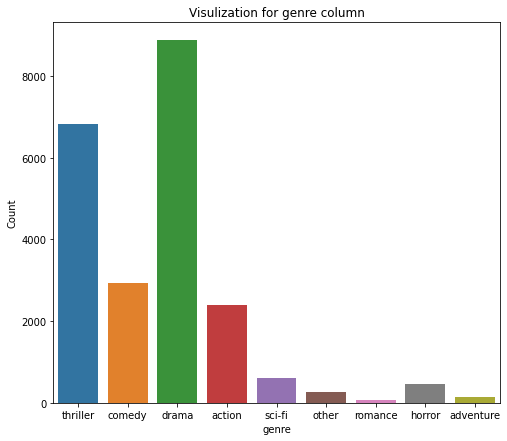

In [15]:
plt.figure(figsize=(8,7))
sns.countplot(x='genre',data=df)
plt.title("Visulization for genre column")
plt.xlabel("genre")
plt.ylabel("Count")
plt.show()

In [16]:
#how to find unique value
df['genre'].unique()

array(['thriller', 'comedy', 'drama', 'action', 'sci-fi', 'other',
       'romance', 'horror', 'adventure'], dtype=object)

In [17]:
#mapping the data set
genre_map = {'thriller':1, 'comedy':2, 'drama':3, 'action':4, 'sci-fi':5, 'other':6,'romance':7, 'horror':8, 'adventure':9}
df['genre'] = df['genre'].map(genre_map)

In [18]:
df.head()

,text,genre
0,"eady dead, maybe even wishing he was. INT. 2ND...",1
1,"t, summa cum laude and all. And I'm about to l...",2
2,"up Come, I have a surprise.... She takes him ...",3
3,ded by the two detectives. INT. JEFF'S APARTME...,1
4,"nd dismounts, just as the other children reach...",3


#Cleaning and Preprocessing the Data set

In [19]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
# Cleaning the text
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):

  # Cleaning special character from the script words
  words = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])

  # Converting the entire script into lower case
  words = words.lower()

  # Tokenizing the script by words
  words = words.split()

  # Removing the stop words
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  words = ' '.join(words)

  # Creating a corpus
  corpus.append(words)

In [21]:
corpus[:15]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [22]:
drama_words = []
for i in list(df[df['genre']==3].index):
  drama_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==2].index):
  comedy_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==4].index):
  action_words.append(corpus[i])

romance_words = []
for i in list(df[df['genre']==7].index):
  romance_words.append(corpus[i])

adventure_words = []
for i in list(df[df['genre']==9].index):
  adventure_words.append(corpus[i])

drama = ''
comedy = ''
action = ''
romance = ''
adventure = ''

for i in range(1, 7):
  drama += drama_words[i]
  comedy += comedy_words[i]
  action += action_words[i]
  romance += romance_words[i]
  adventure += adventure_words[i]

#Word Cloud

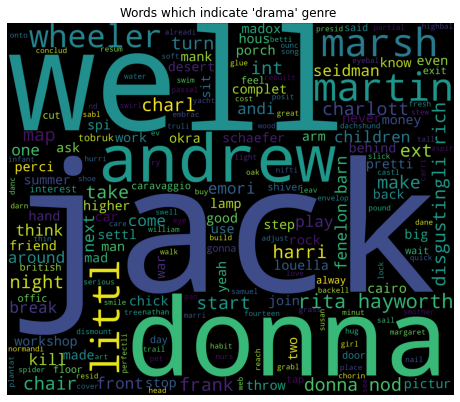

In [23]:
# Creating wordcloud for drama genre
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='Black', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'drama' genre ")
plt.show()

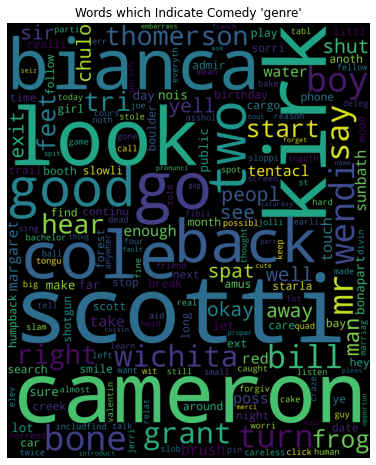

In [24]:
#creating the wordcloud from comedy
from wordcloud import WordCloud
wordcloud2 = WordCloud(background_color='Black', height=3000, width=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.title("Words which Indicate Comedy 'genre'")
plt.axis("off")
plt.show()

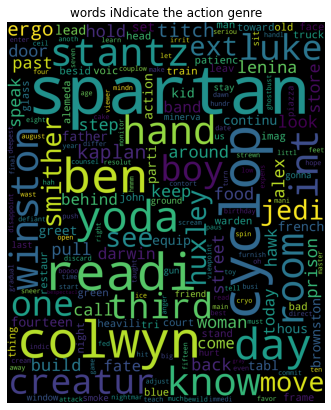

In [25]:
#Creating the wordcloud from action genre
from wordcloud import WordCloud
wordcloud3 = WordCloud(background_color='Black', height=3000, width=2500).generate(action)
plt.figure(figsize=(7,7))
plt.imshow(wordcloud3)
plt.axis("off")
plt.title("words iNdicate the action genre")
plt.show()

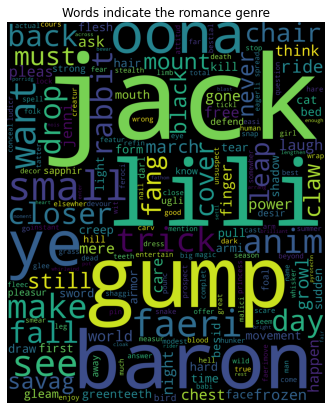

In [26]:
#Creating the wordcloud from romance 'genre'
from wordcloud import WordCloud
wordcloud4 = WordCloud(background_color='Black',height=3000,width=2500).generate(romance)
plt.figure(figsize=(7,7))
plt.title("Words indicate the romance genre")
plt.axis('off')
plt.imshow(wordcloud4)
plt.show()

#Creating the Bag of Words

In [27]:
#Creating Bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000,ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [28]:
y = df['genre'].values

In [29]:
y

array([1, 2, 3, ..., 1, 4, 2])

#Model Building

In [30]:
from sklearn.model_selection import train_test_split
training_x,test_x,training_y,test_y = train_test_split(X,y,test_size=0.2,random_state=0)
print("Training Size: {}, Test Size{}".format(training_x.shape,test_x.shape))

Training Size: (18063, 10000), Test Size(4516, 10000)


#Multinomial Naive Bayes

In [31]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(training_x,training_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [32]:
#Predicting the results
y_pred = mnb.predict(test_x)

In [33]:
from sklearn.metrics import accuracy_score
score = accuracy_score(test_y,y_pred)
print("-------Score---------")
print("Accuracy Score is: {}".format(round(score*100,2)))

-------Score---------
Accuracy Score is: 89.57


In [34]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y,y_pred)

In [35]:
cm

array([[1173,   21,   77,   14,   22,    0,    0,   11,    0],
       [  11,  517,   18,    7,    4,    0,    0,    2,    0],
       [ 103,   38, 1607,   42,   11,    3,    1,   21,    1],
       [  11,    8,    6,  450,    0,    0,    0,    1,    0],
       [   8,    2,    7,    2,  112,    0,    0,    1,    0],
       [   0,    0,    1,    1,    0,   62,    0,    2,    0],
       [   0,    0,    0,    1,    0,    0,   10,    0,    0],
       [   3,    1,    4,    1,    0,    0,    0,   73,    0],
       [   1,    0,    1,    2,    0,    0,    0,    0,   41]])

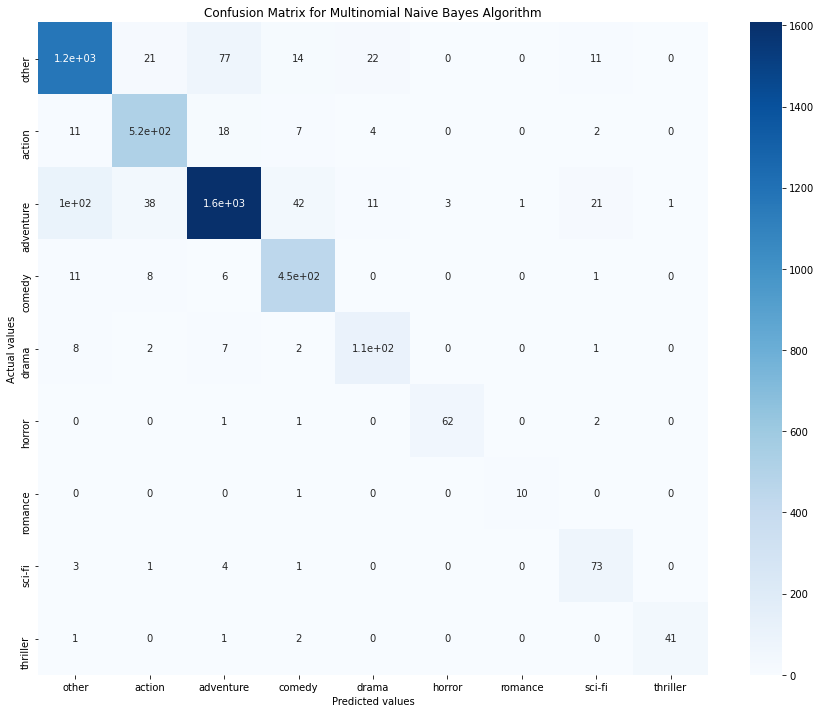

In [36]:
# Plotting the confusion matrix
plt.figure(figsize=(15,12))
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [37]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_mnb = MultinomialNB(alpha=i)
  temp_mnb.fit(training_x, training_y)
  temp_y_pred = temp_mnb.predict(test_x)
  score = accuracy_score(test_y, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 91.34%
Accuracy score for alpha=0.2 is: 91.08%
Accuracy score for alpha=0.3 is: 90.85%
Accuracy score for alpha=0.4 is: 90.59%
Accuracy score for alpha=0.5 is: 90.26%
Accuracy score for alpha=0.6 is: 90.12%
Accuracy score for alpha=0.7 is: 90.04%
Accuracy score for alpha=0.8 is: 89.95%
Accuracy score for alpha=0.9 is: 89.79%
Accuracy score for alpha=1.0 is: 89.57%
--------------------------------------------
The best accuracy is 91.34% with alpha value as 0.1


In [38]:
mnb = MultinomialNB(alpha=0.1)
mnb.fit(training_x,training_y)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

#Prediction

In [39]:
def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)

  temp = cv.transform([final_script]).toarray()
  return mnb.predict(temp)[0]

In [40]:
#For generating random integer
from random import randint

In [41]:
# Loading test dataset
test = pd.read_csv('/content/drive/My Drive/move_test.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [42]:
test.shape

(5589, 2)

In [43]:
test.drop('id', axis=1, inplace=True)
test.head(10)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
5,im from ear to ear. Ya want me to make a state...
6,"BEN We need to help Reed Sue shakes her head,..."
7,slowly. At the entrance to the alley stands a ...
8,edge of the field. Neil steps closer. THE TOMB...
9,"special, take ya in the kitchen and suck your ..."


In [44]:
#Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_map.keys())[value]))

Script: d puts on the pajamas. Boss Kean opens the heavy lid of the box and we see it is grilled with heavy chain link fencing and with strap iron bars. A chamber pot is put inside. Alibi stands in the box, looking back at them, then lies down out of sight. The lid is slammed shut. FULL SHOT The men watching this. The mess hall door opens and they begin to file in. INT. BARRACKS NIGHT as the Wicker Man whales away at his tire rim outside the barracks. CARR Awright, first bell! Let's hit them bunks! The men are piling into bunks and the CAMERA FINDS Luke heaving himself with a kind of rueful amusement up to the third tier bunk he sleeps in he's exhausted. DRAGLINE Plumb busted out. Looks like the hard road finally got to Mister Lucas War Hero. LUKE agreeably Back at it in the mornin'. Just need a little nap... He lies back. Across him and in various perspectives are the other participants in this conversation, speaking in the ventriloquist's whisper while the stragglers get into the sac

In [45]:
#Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_map.keys())[value]))

Script: an. When she steps forward, parting the curtain of light like a niade stepping through a waterfall, it is the Princess Lili who appears. JACK Lili! OONA LILI Come then, Green Jack, you've promises to keep... Oona Lili moves closer to Jack, running her hand behind his neck, embracing him. JACK No... this isn't real... OONA LILI Oh, but it is... I'm warm and alive and happy to be in your arms. Furiously, Jack thrusts her aside. JACK I'll not be enchanted! This is foul magic...! What an abhorrent creature would I be to dally with faeries guised as my beloved when the Princess herself has suffered God knows what fate. C.U. OONA LILI OONA LILI harsh and spiteful I wish I could show you that fate... Your precious princess! I wish you could see her now! CUT TO INT. BARON'S CASTLE NIGHT C.U. LILI Lili has completely transformed into a savage beast. Fur covers her face, her ears are pointed. Sharp fangs punctuate her lips. Only her eyes still seem human and afraid. LILI very frightened 

In [46]:
#Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_map.keys())[value]))

Script:  Neo falls to the blue shag carpeting, blood smearing down the wall paper. Agent Smith stands over him, still aiming, taking no chances. AGENT SMITH Check him. INT. MAIN DECK Amid the destruction raining around her, Trinity takes hold of Neo's body. TRINITY Neo... INT. HALL DAY Kneeling beside him, Agent Brown checks his vital signs. AGENT BROWN He's gone. Agent Smith smiles, standing over him. AGENT SMITH Good bye, Mr. Anderson. INT. MAIN DECK In tears, Morpheus takes hold of the EMP switch. Trinity whispers in Neo's ear. TRINITY Neo, please, listen to me. I promised to tell you the rest. The Oracle, she told me that I'd fall in love and that man, the man I loved would be the One. You see? You can't be dead, Neo, you can't be because I love you. You hear me? I love you! Her eyes close and she kisses him, believing in all her heart that he will feel her lips and know that they speak the truth. INT. HOTEL HALL DAY He does. And they do. His eyes snap open. INT. MAIN DECK Trinity 

In [47]:
#Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_map.keys())[value]))

Script: te. He kept his baton in his right hand. In Hitler's presence. That was a brave act... STEVE Brave? To celebrate Hitler's birthday with some heroic piece by Wagner but without the Nazi salute? Bravo. WERNER It was Beethoven's Ninth. STEVE Do you really think it was brave? Didn't he bow to him and shake his hand? INT. STEVE'S OFFICE DAY Another man, SCHLEE, is in the chair. Only Steve and Emmi now. Pale, yellow electric light. Silence. Schlee, too, is very nervous. At last SCHLEE No, no, no, I give you my word. I was never a member of the Nazi Party. Never. I am in the percussion section. I play the timpani. Steve just stares at him. SCHLEE Anyway, they would never have allowed it. My brother was married to a Jewess, may she rest in peace. And Goebbels said... to Emmi ...please take this down carefully, because it's most important, Fraulein? EMMI Straube. SCHLEE acting surprised Straube? Are you by any chance related to Colonel Joachim Straube? EMMI My father. SCHLEE He was... h

In [48]:
#Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_map.keys())[value]))

Script:  TOY STORY TOY STORY Original Story by John Lasseter Pete Docter Andrew Stanton Joe Ranft Screenplay by Joss Whedon Andrew Stanton Joel Cohen and Alec Sokolow FINAL DRAFT November 1995 TOY STORY FADE IN INT. ANDY'S BEDROOM A row of moving boxes lie on the floor of the room. They are drawn up in crayon to look like a miniature Western town. The bedroom is lined with cloud wallpaper giving the impression of sky. One of the boxes has a children's illustrated WANTED poster of a Mr. Potato Head taped to it. A MR. POTATO HEAD DOLL is set in front of the poster. The VOICE OVER of ANDY, a 6 year old boy, can be heard acting out all the voices of the scene. ANDY AS POTATO HEAD Alright everyone, this is a stick up! Don't anybody move! Now empty that safe! A GROUP OF TOYS have been crowded together in front of the BANK box. Andy's hand lowers a CERAMIC PIGGY BANK in front of Mr. Potato Head and shakes out a pile of coins to the floor. Mr. Potato Head kisses the coins. ANDY AS POTATO HEAD 

In [49]:
#Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_map.keys())[value]))

Script: ield to me. RODERICK On the instant. Everyone must yield to such a nobleman as you. COUNT Very well but a man who yields takes to his legs. RODERICK That is a trifle strong. COUNT Take to your legs, low Irish dog. Roderick smiles at him. RODERICK Your Excellency has wantonly insulted me. That being so, I conclude that you hate me, Monseigneur, and that hence you would be glad to remove me from the number of the living. In this wish, I can and will satisfy Your Excellency. EXT. BEAUTIFUL GARDEN EARLY MORNING Roderick's sword duel with the Count. Details to be worked out. INT. BILLIARD ROOM NIGHT Roderick watches the Chevalier play with a Prussian officer, Lieutenant Dascher. RODERICK V.O. It was my unrivaled skill with sword and pistol, and readiness to use them, that maintained the reputation of the firm. Towards the end of the game, Dascher, seeing that he is losing, makes an unfair stroke, so obvious that the marker tells him so to his face. Lieutenant Dascher, for whom the s